In [1]:
import compress_pickle as cp
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = cp.load('./metrics/ee_metrics_x_experiments_df_NEW.gz')

In [22]:
data = data.drop(['macromatch_rate_feel', 'undermatch_rate_feel', 'overmatch_rate_feel', 'macromatch_rate', 'unmatch_rate', 'cep_c', 'cep_co', 'cep_cu', 'cep_o', 'cep_ozero', 'cep_u', 'cep_total', 'cep_cp', 'cep_cop', 'cep_cup', 'cep_cx', 'cep_op', 'cep_ozp', 'cep_up'], axis = 1)

<Axes: xlabel='method_house_elec'>

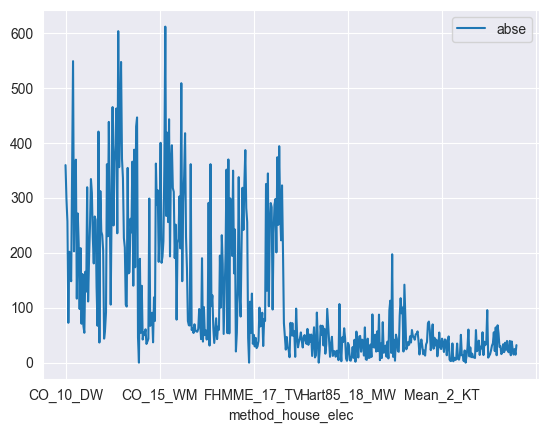

In [3]:
data.plot(y=['abse'])

<Axes: >

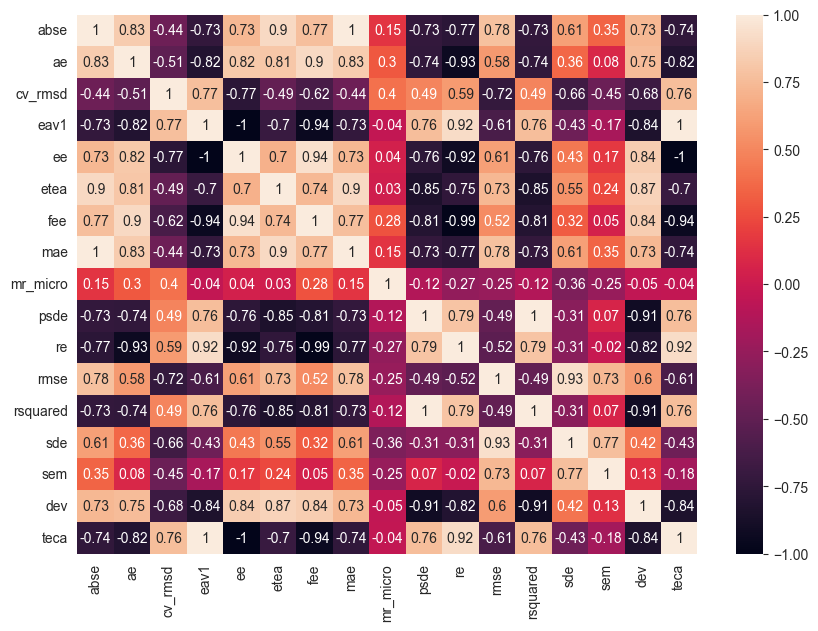

In [27]:
plt.rcParams['figure.figsize'] = (10, 7)
correlation_matrix_spearman = data.corr(method='spearman').round(2)
sn.heatmap(correlation_matrix_spearman, annot=True)

<Axes: >

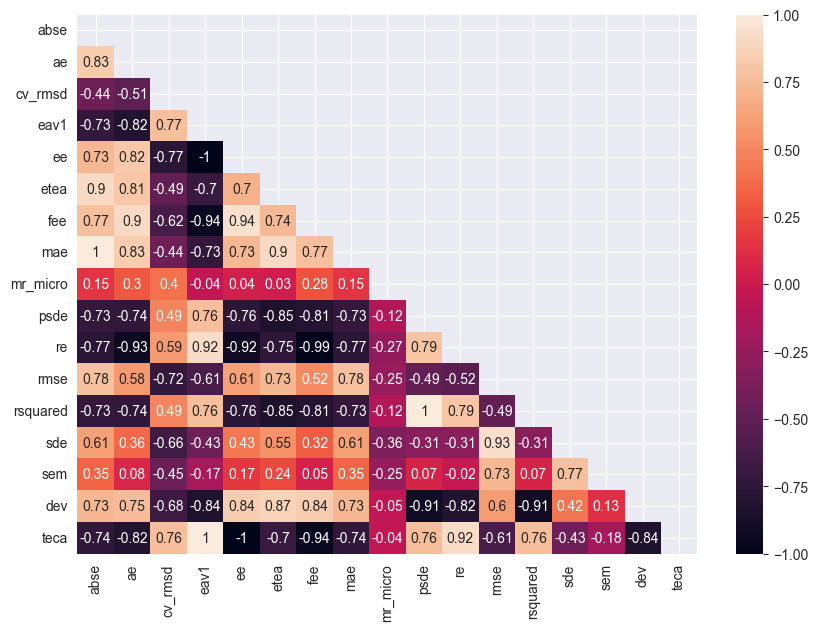

In [28]:
mask = np.triu(np.ones_like(correlation_matrix_spearman, dtype=bool))
upper_triangle = correlation_matrix_spearman.mask(mask)
sn.heatmap(upper_triangle, annot=True)

<Axes: >

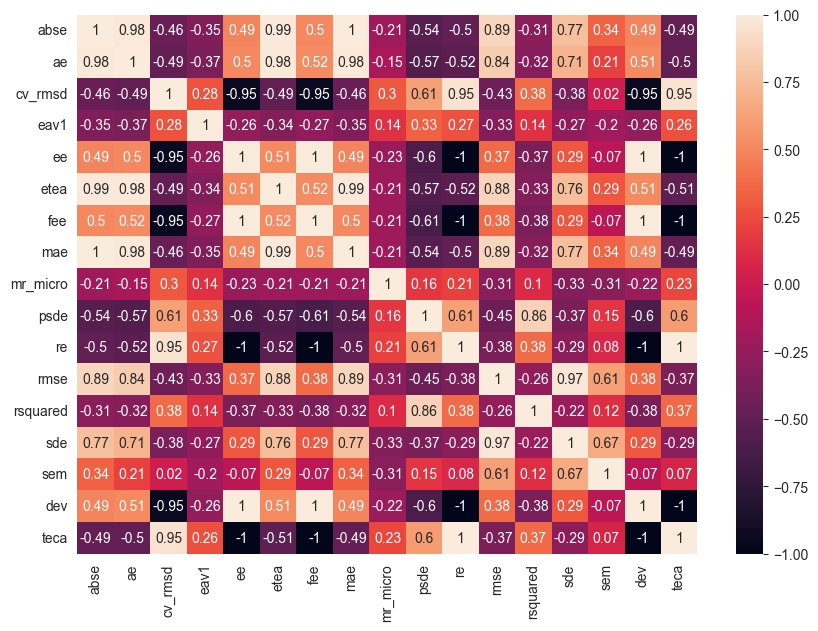

In [29]:
correlation_matrix_pearson = data.corr(method='pearson').round(2)
sn.heatmap(correlation_matrix_pearson, annot=True)

<Axes: >

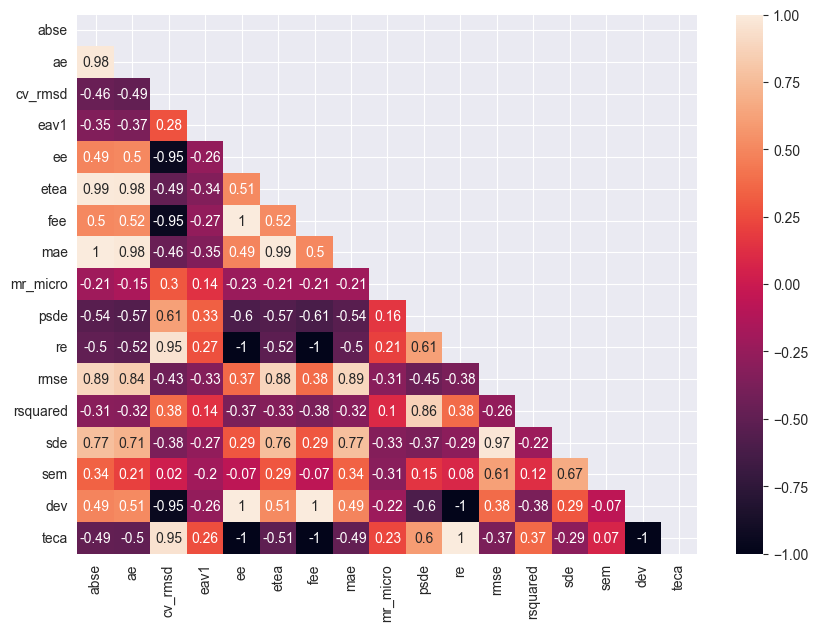

In [30]:
mask = np.triu(np.ones_like(correlation_matrix_pearson, dtype=bool))
upper_triangle = correlation_matrix_pearson.mask(mask)
sn.heatmap(upper_triangle, annot=True)

<Axes: >

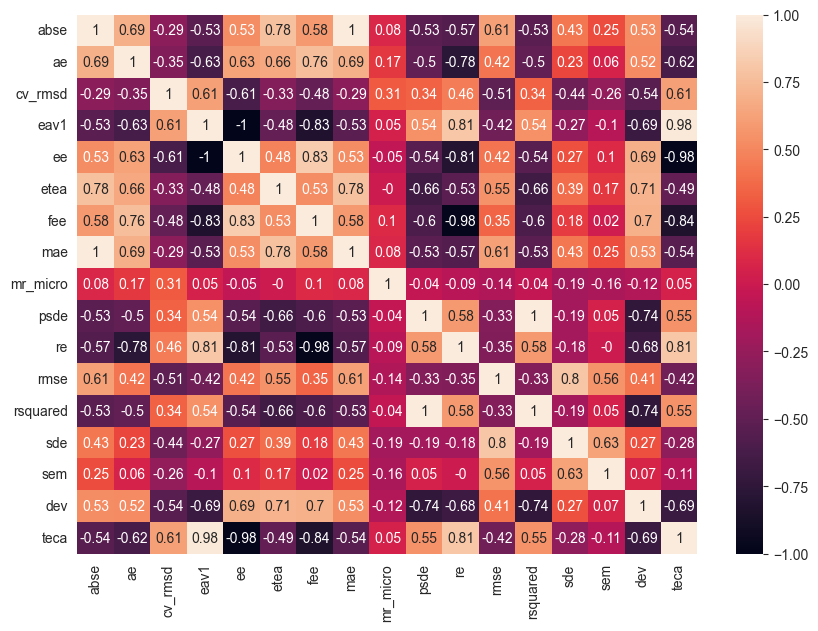

In [31]:
correlation_matrix_kendall = data.corr(method='kendall').round(2)
sn.heatmap(correlation_matrix_kendall, annot=True)

<Axes: >

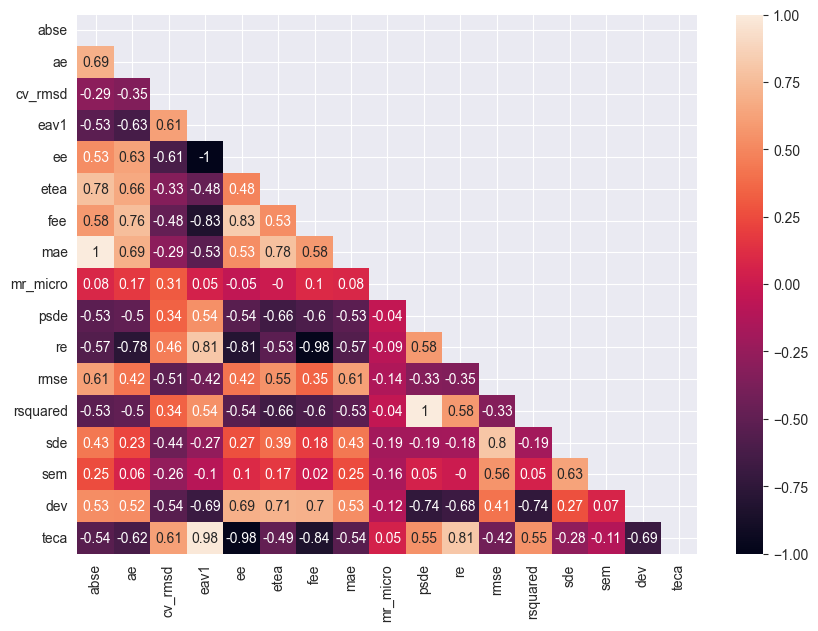

In [32]:
mask = np.triu(np.ones_like(correlation_matrix_kendall, dtype=bool))
upper_triangle = correlation_matrix_kendall.mask(mask)
sn.heatmap(upper_triangle, annot=True)

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [72.5, 72.5, 102.5, 102.5],
  [42.5, 42.5, 87.5, 87.5],
  [12.5, 12.5, 65.0, 65.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [132.5, 132.5, 160.0, 160.0],
  [38.75, 38.75, 146.25, 146.25]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.3976598211201797, 0.3976598211201797, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.39089640571384127, 0.39089640571384127, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.023094010767585035, 0.023094010767585035, 0.0],
  [0.0, 0.07483314773547879, 0.07483314773547879, 0.0],
  [0.0, 0.3635014901390823, 0.3635014901390823, 0.07483314773547879],
  [0.023094010767585035,
   0.7598245411496877,
   0.7598245411496877,
   0.3635014901390823],
  [0.39089640571384127,
   1.0349020350845

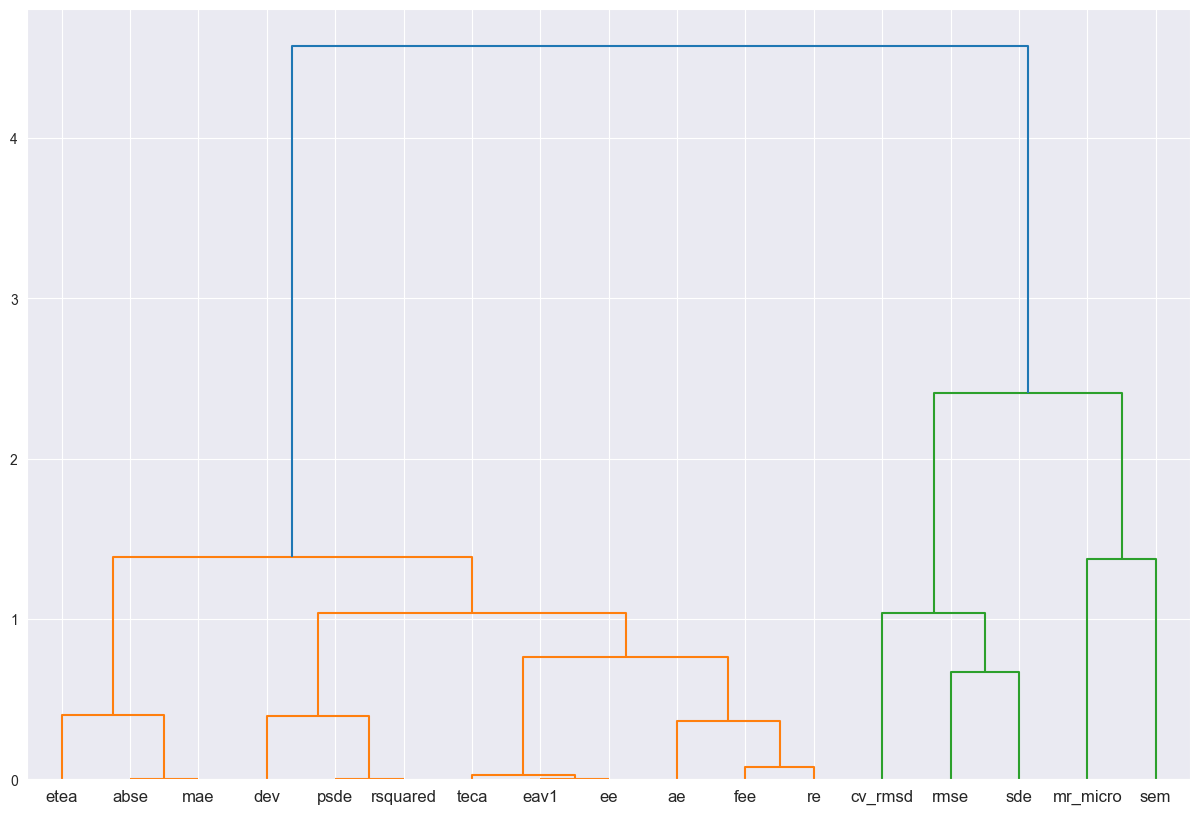

In [51]:
plt.rcParams['figure.figsize'] = (15, 10)
absolute_correlation_matrix_spearman = correlation_matrix_spearman.abs()
linkage_matrix_spearman = linkage(absolute_correlation_matrix_spearman, method='ward')
dendrogram(linkage_matrix_spearman, labels=absolute_correlation_matrix_spearman.columns)

In [52]:
threshold = 0.5

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [28.125, 28.125, 91.25, 91.25],
  [125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [130.0, 130.0, 152.5, 152.5],
  [59.6875, 59.6875, 141.25, 141.25]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.020000000000000018, 0.020000000000000018, 0.0],
  [0.0, 0.06708203932499365, 0.06708203932499365, 0.0],
  [0.0, 0.35482389998420344, 0.35482389998420344, 0.06708203932499365],
  [0.0, 0.53380708125689, 0.53380708125689, 0.35482389998420344],
  [0.020000000000000018,
   0.5784894121762301,
   0.5784894121762301,
   0.53380708125689],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.34563950391508586, 0.34563950391508586, 0.0],
  [0.0, 1.68839963

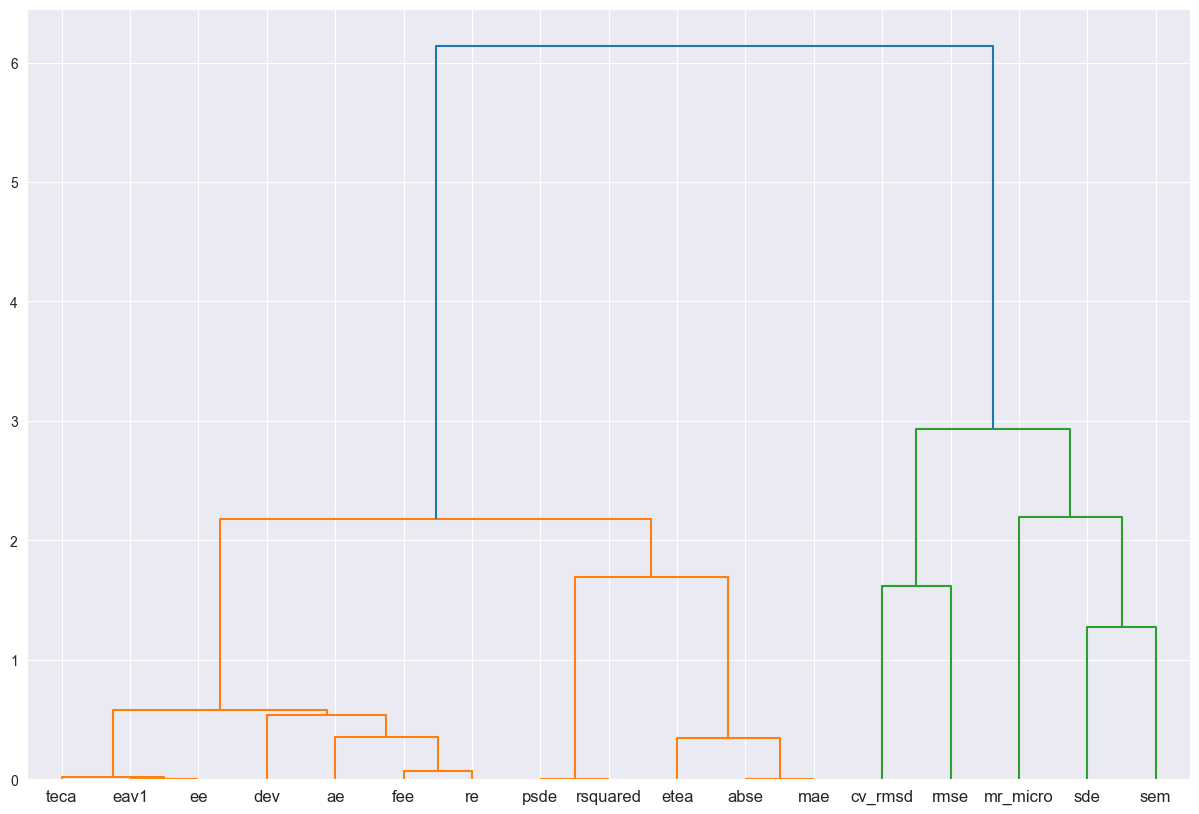

In [53]:
filtered_correlation_spearman = absolute_correlation_matrix_spearman.mask(np.abs(absolute_correlation_matrix_spearman) <= threshold, 0)
filtered_linkage_matrix_spearman = linkage(filtered_correlation_spearman, method='ward')
dendrogram(filtered_linkage_matrix_spearman, labels=filtered_correlation_spearman.columns)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [5.0, 5.0, 31.25, 31.25],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [105.0, 105.0, 115.0, 115.0],
  [73.75, 73.75, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [130.0, 130.0, 152.5, 152.5],
  [91.875, 91.875, 141.25, 141.25],
  [18.125, 18.125, 116.5625, 116.5625]],
 'dcoord': [[0.0, 0.009999999999999995, 0.009999999999999995, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.02309401076758505, 0.02309401076758505, 0.0],
  [0.009999999999999995,
   0.052977982848223575,
   0.052977982848223575,
   0.02309401076758505],
  [0.0, 0.25402099650750665, 0.25402099650750665, 0.052977982848223575],
  [0.0, 0.010000000000000009, 0.010000000000000009, 0.0],
  [0.0, 0.09746794344808965, 0.09746794344808965, 0.010000000000000009],
  [0.0, 0.1931320791582797, 0.193132079158279

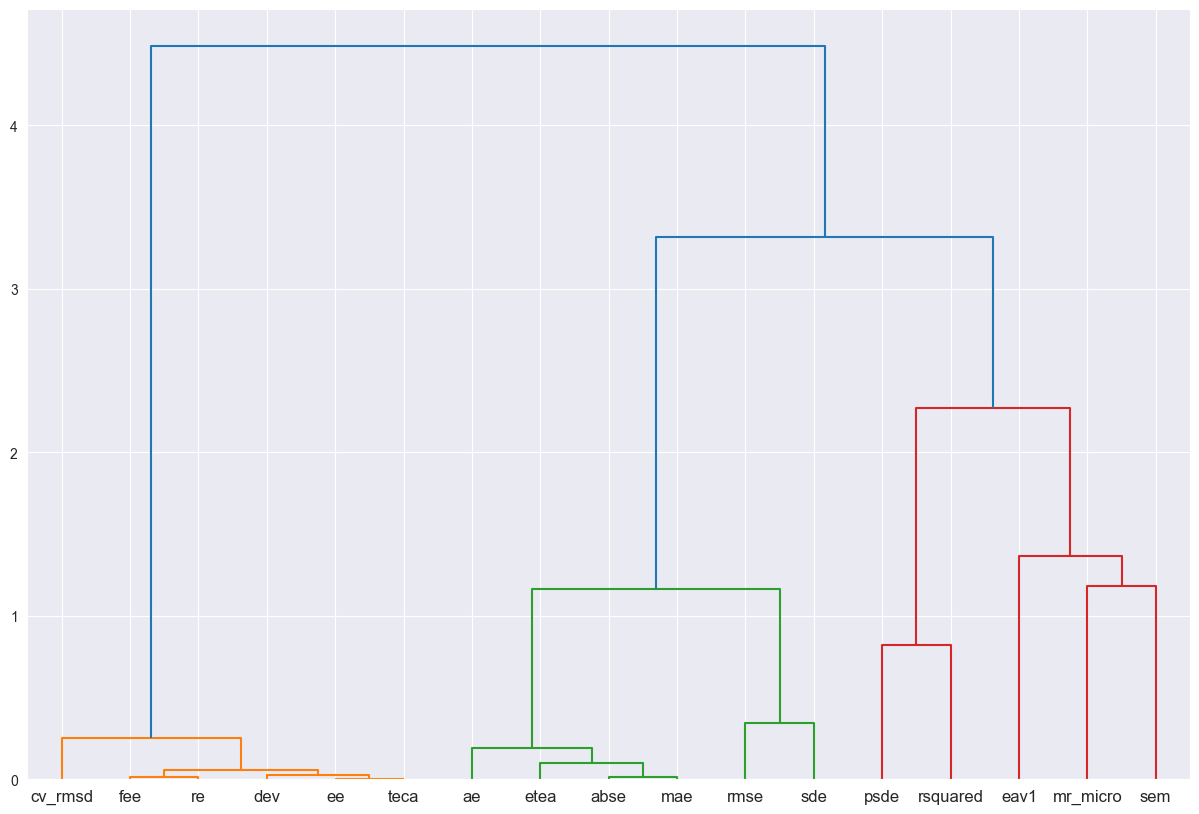

In [54]:
absolute_correlation_matrix_pearson = correlation_matrix_pearson.abs()
linkage_matrix_pearson = linkage(absolute_correlation_matrix_pearson, method='ward')
dendrogram(linkage_matrix_pearson, labels=absolute_correlation_matrix_pearson.columns)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [22.5, 22.5, 52.5, 52.5],
  [5.0, 5.0, 37.5, 37.5],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [80.0, 80.0, 110.0, 110.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [95.0, 95.0, 143.75, 143.75],
  [21.25, 21.25, 119.375, 119.375]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.020000000000000018, 0.020000000000000018, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.6057502235520292, 0.6057502235520292, 0.0],
  [0.020000000000000018,
   0.9484197383015603,
   0.9484197383015603,
   0.6057502235520292],
  [0.0, 2.0572855439933004, 2.0572855439933004, 0.9484197383015603],
  [0.0, 0.7247758274114832, 0.7247758274114832, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.2559296778413946, 0.2559296778413946, 0.0],
  [0.0, 1.330545001117963, 1.330545001117

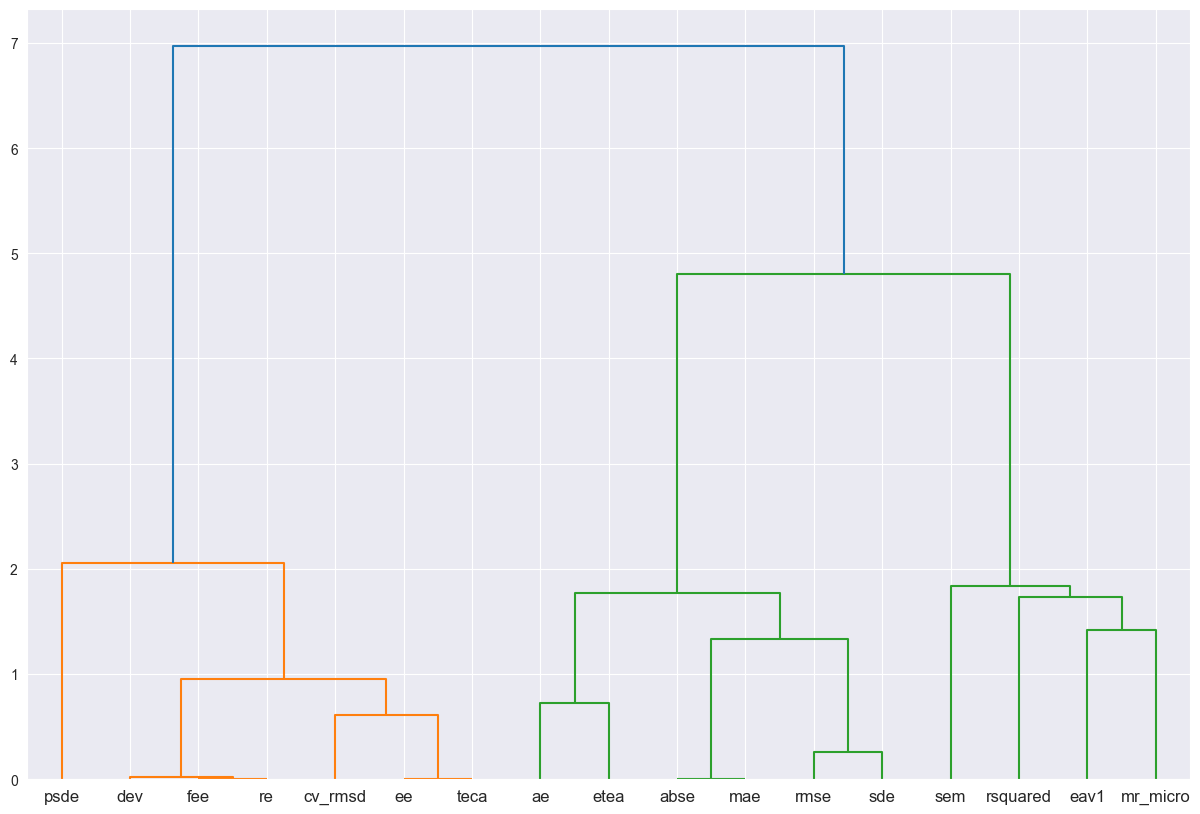

In [55]:
filtered_correlation_pearson = absolute_correlation_matrix_pearson.mask(np.abs(absolute_correlation_matrix_pearson) <= threshold, 0)
filtered_linkage_matrix_pearson = linkage(filtered_correlation_pearson, method='ward')
dendrogram(filtered_linkage_matrix_pearson, labels=filtered_correlation_pearson.columns)